In [12]:
import config
%run -m config

In [13]:
%load_ext autoreload
%autoreload 1
%aimport genalgo 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
if __name__ == '__main__':     
     output = genalgo.genetic_algo_start(np.array([(50,60),(10**(-15),10**(15)),(-10**(30),-1) ,(1,10**(30)),(1,10**(30))]),
                                        30,3,20,loaded_population=None) #You can save the current population, and execute the code
        #at a later time using loaded_population = the_population_you_saved. Of course they need to be of the same size, but you
        #dont have to worry about the vectical size as it automatically sets the last element as the new starting population
        
        
        #Pass the starting bounds for the algorithm , the number of players in each generation , how many of the best players you
        #want to keep at each iteration and finally the total number of iterations
    
        #The bounds must be passed with the same order as the variables where declared

Generation : 1 took 4.950 seconds to finish
***Time remaining: 1.567 minutes***
Generation : 2 took 4.833 seconds to finish
***Time remaining: 1.450 minutes***
Generation : 3 took 4.838 seconds to finish
***Time remaining: 1.371 minutes***
Generation : 4 took 4.619 seconds to finish
***Time remaining: 1.232 minutes***
Generation : 5 took 4.613 seconds to finish
***Time remaining: 1.153 minutes***
Generation : 6 took 4.634 seconds to finish
***Time remaining: 1.081 minutes***
Generation : 7 took 4.775 seconds to finish
***Time remaining: 1.035 minutes***
Generation : 8 took 4.842 seconds to finish
***Time remaining: 0.968 minutes***
Generation : 9 took 4.802 seconds to finish
***Time remaining: 0.880 minutes***
Generation : 10 took 5.062 seconds to finish
***Time remaining: 0.844 minutes***
Generation : 11 took 4.995 seconds to finish
***Time remaining: 0.749 minutes***
Generation : 12 took 4.911 seconds to finish
***Time remaining: 0.655 minutes***
Generation : 13 took 4.839 seconds to

In [15]:
populations = output[0]
best = output[1]
keep_scores = output[2]
cleared = genalgo.clear_points(best)
c, nS_values, r_values = cleared[0], cleared[1], cleared[2]

# We get only the points that trully fit the constraints.You can check that len(c) /= len(b)
print(f"The algorithm has a success rate of {100*(len(c))/(len(best)*len(best[0])):.3f} %")

The algorithm has a success rate of 80.000 %


In [16]:
#print(c) #These are all the viable points.If you want to get them print them out or use np to make the a txt file

In [17]:
#print(nS_values)
#print(r_values) These are the nS-r points. Print them or extract them as needed 

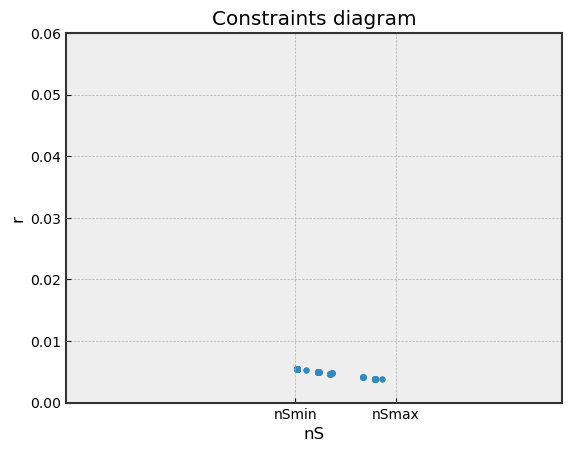

In [18]:
#Simplistic diagramm

fig, ax = plt.subplots()
genalgo.style(ax)
plt.scatter(nS_values,r_values, s=17)
plt.xlim(0.94,0.98)
plt.ylim(0,0.06)
xtick_values = [genalgo.nSmin, genalgo.nSmax]
xtick_labels = ['nSmin', 'nSmax']
plt.xticks(xtick_values, xtick_labels)
plt.title('Constraints diagram')
plt.xlabel('nS')
plt.ylabel('r')
plt.savefig('Gen_Algo_Diagramm.png')
plt.show()

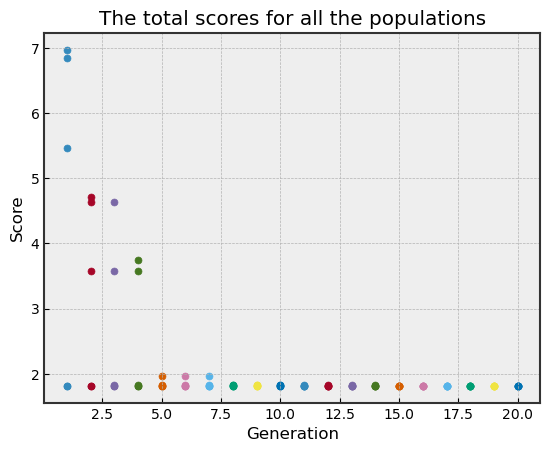

In [19]:
#Now for the scores

fig, ax = plt.subplots()

for index, row in enumerate(keep_scores):
    x_arr = np.full(len(row), index+1)
    y_arr = np.array(row)
    ax.scatter(x_arr, y_arr, s=25)
plt.title('The total scores for all the populations')
plt.xlabel("Generation")
plt.ylabel("Score")
genalgo.style(ax)
plt.show()

#We can see that the best players dont get significantly better, but the rest of the players exhibit an exponential convergence 
#towards the local optimum.

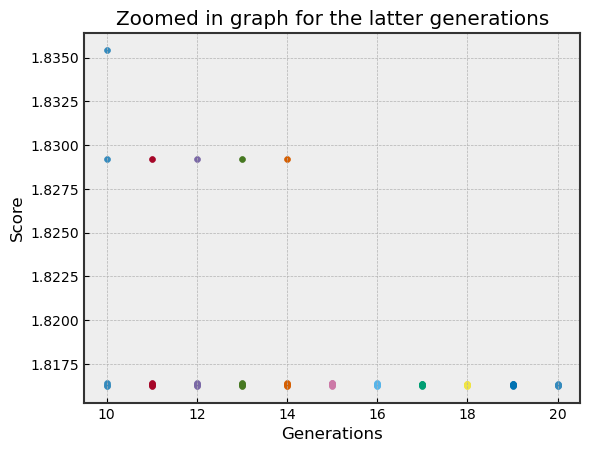

In [20]:

fig, ax = plt.subplots()
start = 10
for index, row in enumerate(keep_scores[start-1:]):
    x_arr = np.full(len(row), index+start)
    y_arr = np.array(row)
    ax.scatter(x_arr, y_arr, s=18)

plt.title('Zoomed in graph for the latter generations')
plt.xlabel("Generations")
plt.ylabel("Score")
genalgo.style(ax)
plt.show()

In [21]:
print(keep_scores) #A score of approximately 1.8 - 2 means the algorithm has converged

[[1.81624883 1.81642859 5.4671452  6.84615712 6.97071228]
 [1.81624883 1.81642859 3.58334043 4.63673292 4.7123736 ]
 [1.81624883 1.81642859 1.83544114 3.58334043 4.63673292]
 [1.81624883 1.81642859 1.83544114 3.58334043 3.73904857]
 [1.81624883 1.81630251 1.81642859 1.83544114 1.96117023]
 [1.81624883 1.81630251 1.81642859 1.83544114 1.96117023]
 [1.81624883 1.81630251 1.81642859 1.83544114 1.96117023]
 [1.81624883 1.81630251 1.81642859 1.82919706 1.83544114]
 [1.81624883 1.81630251 1.81642859 1.82919706 1.83544114]
 [1.81624883 1.81630251 1.81642859 1.82919706 1.83544114]
 [1.81624883 1.81630251 1.81633061 1.81642859 1.82919706]
 [1.81624883 1.81630251 1.81633061 1.81642859 1.82919706]
 [1.81624883 1.81630251 1.81633061 1.81642859 1.82919706]
 [1.81624883 1.81630251 1.81633061 1.81642859 1.82919706]
 [1.81624883 1.81630251 1.81633061 1.81642859 1.81643344]
 [1.81624883 1.81629272 1.81630251 1.81633061 1.81642859]
 [1.81624883 1.81629272 1.81630251 1.81632736 1.81633061]
 [1.81624883 1